In [2]:
import sys
sys.path.append('../')
from config import configuration
config = configuration()
config.request_password()

 ·············


In [3]:
import sqlutilpy
data = pd.DataFrame(
         sqlutilpy.get('''
         with p as (select * from thomas_molnar.virac2_variable_sources_eaeb where prob>0.9 and class='RRab')
         select p.*,v.l,v.b,v.j_ivw_mean_mag,v.h_ivw_mean_mag,
         v.ks_ivw_mean_mag,v.j_ivw_err_mag,v.h_ivw_err_mag, v.ks_n_ambiguous, v.ks_n_detections,
         v.ks_ivw_err_mag,v.pmra,v.pmdec,v.ra,v.dec,
         v.pmra_error, v.pmdec_error, v.pmra_pmdec_corr, v.parallax, v.parallax_error from p 
         inner join thomas_molnar.virac2_variable_data as v on p.sourceid=v.sourceid''',
                    **config.wsdb_kwargs)
       )

In [4]:
import sqlutilpy
data_allRRab = pd.DataFrame(
         sqlutilpy.get('''
         with p as (select * from thomas_molnar.virac2_variable_sources_eaeb where class='RRab')
         select p.*,v.l,v.b,v.j_ivw_mean_mag,v.h_ivw_mean_mag,
         v.ks_ivw_mean_mag,v.j_ivw_err_mag,v.h_ivw_err_mag, v.ks_n_ambiguous, v.ks_n_detections,
         v.ks_ivw_err_mag,v.pmra,v.pmdec,v.ra,v.dec,
         v.pmra_error, v.pmdec_error, v.pmra_pmdec_corr, v.parallax, v.parallax_error from p 
         inner join thomas_molnar.virac2_variable_data as v on p.sourceid=v.sourceid''',
                    **config.wsdb_kwargs)
       )

In [5]:
def onsky_plot(data,label='RRab',ff=None):
    if ff is None:
        ff=plt.figure(figsize=[15.,4.])
    plt.hist2d(data['l']-360.*(data['l']>180.),data['b'],bins=[200,50],norm=LogNorm(),
              cmap=plt.cm.viridis);

    plt.ylabel('Galactic latitude (deg)')
    plt.annotate(label,xy=(-65,3.5),fontsize=23,ha='right')
    plt.grid(zorder=0,color='k',lw=0.5,alpha=0.2)
    plt.xticks(-np.arange(-10,66,5));
    plt.xlim(11.,-66)
    plt.ylim(-10.4,5.4)
    plt.gca().set_aspect('equal')

In [6]:
import sqlutilpy
dataRRcd = pd.DataFrame(
         sqlutilpy.get('''
         with p as (select * from thomas_molnar.virac2_variable_sources_eaeb where prob>0.9 and class='RRcd')
         select p.*,v.l,v.b,v.j_ivw_mean_mag,v.h_ivw_mean_mag,
         v.ks_ivw_mean_mag,v.pmra,v.pmdec,v.ra,v.dec,
         v.pmra_error, v.pmdec_error, v.pmra_pmdec_corr from p inner join thomas_molnar.virac2_variable_data as v on p.sourceid=v.sourceid''',
                    **config.wsdb_kwargs)
       )

In [7]:
import sqlutilpy
dataEW = pd.DataFrame(
         sqlutilpy.get('''
         with p as (select * from thomas_molnar.virac2_variable_sources_eaeb where prob>0.9 and class='EW')
         select p.*,v.ra,v.dec,v.l,v.b,v.j_ivw_mean_mag,v.h_ivw_mean_mag,v.ks_ivw_mean_mag 
         from p inner join thomas_molnar.virac2_variable_data as v on p.sourceid=v.sourceid''',
                    **config.wsdb_kwargs)
       )

In [8]:
import sqlutilpy
dataEAEB = pd.DataFrame(
         sqlutilpy.get('''
         with p as (select * from thomas_molnar.virac2_variable_sources_eaeb where prob>0.9 and class='EA/EB')
         select p.*,v.l,v.b,v.j_ivw_mean_mag,v.h_ivw_mean_mag,
         v.ks_ivw_mean_mag,v.pmra,v.pmdec,v.ra,v.dec,
         v.pmra_error, v.pmdec_error, v.pmra_pmdec_corr from p 
         inner join thomas_molnar.virac2_variable_data as v on p.sourceid=v.sourceid''',
                    **config.wsdb_kwargs)
       )

In [9]:
import sqlutilpy
data_pure_CEP = pd.DataFrame(
         sqlutilpy.get('''
         with p as (select * from thomas_molnar.virac2_variable_sources_eaeb where prob>0.9 and 
         (class='CEP'))
         select p.*,v.l,v.b,v.ra,v.dec,v.ks_ivw_mean_mag from p inner join thomas_molnar.virac2_variable_data as v on p.sourceid=v.sourceid''',
                    **config.wsdb_kwargs)
       )

In [10]:
import sqlutilpy
data_train_CEP = pd.DataFrame(
         sqlutilpy.get('''
         with p as (select * from jason_sanders.variable_training_set_virac2 
         where var_class='CEP')
         select * from p inner join leigh_smith.virac2 as v on p.virac_id=v.sourceid
         ''', **config.wsdb_kwargs)
       )

/data/jls/python3.5/site-packages/sqlutilpy/sqlutil.py:398: UserWarning: Column name ra is repeated in the output, new name ra_1 assigned
  'new name %s assigned') % (_n, curn))
/data/jls/python3.5/site-packages/sqlutilpy/sqlutil.py:398: UserWarning: Column name dec is repeated in the output, new name dec_1 assigned
  'new name %s assigned') % (_n, curn))


In [11]:
import sqlutilpy
dataCEP = pd.DataFrame(
         sqlutilpy.get('''
         with p as (select * from thomas_molnar.virac2_variable_sources_eaeb where prob>0.9 and 
         (class='CEP' or class='T2CEP'))
         select p.*,v.l,v.b from p inner join thomas_molnar.virac2_variable_data as v on p.sourceid=v.sourceid''',
                    **config.wsdb_kwargs)
       )

In [12]:
import sqlutilpy
dataT2CEP = pd.DataFrame(
         sqlutilpy.get('''
         with p as (select * from thomas_molnar.virac2_variable_sources_eaeb where prob>0.9 and 
         (class='T2CEP'))
         select p.*,v.l,v.b from p inner join thomas_molnar.virac2_variable_data as v on p.sourceid=v.sourceid''',
                    **config.wsdb_kwargs)
       )

In [13]:
import sqlutilpy
dataLPV = pd.DataFrame(
         sqlutilpy.get('''
         with p as (select * from thomas_molnar.virac2_variable_sources_eaeb where prob>0.9 and 
         (class='LPV'))
         select p.*,v.l,v.b,v.ks_n_ambiguous,v.ks_n_observations 
         from p inner join thomas_molnar.virac2_variable_data as v on p.sourceid=v.sourceid''',
                    **config.wsdb_kwargs)
       )

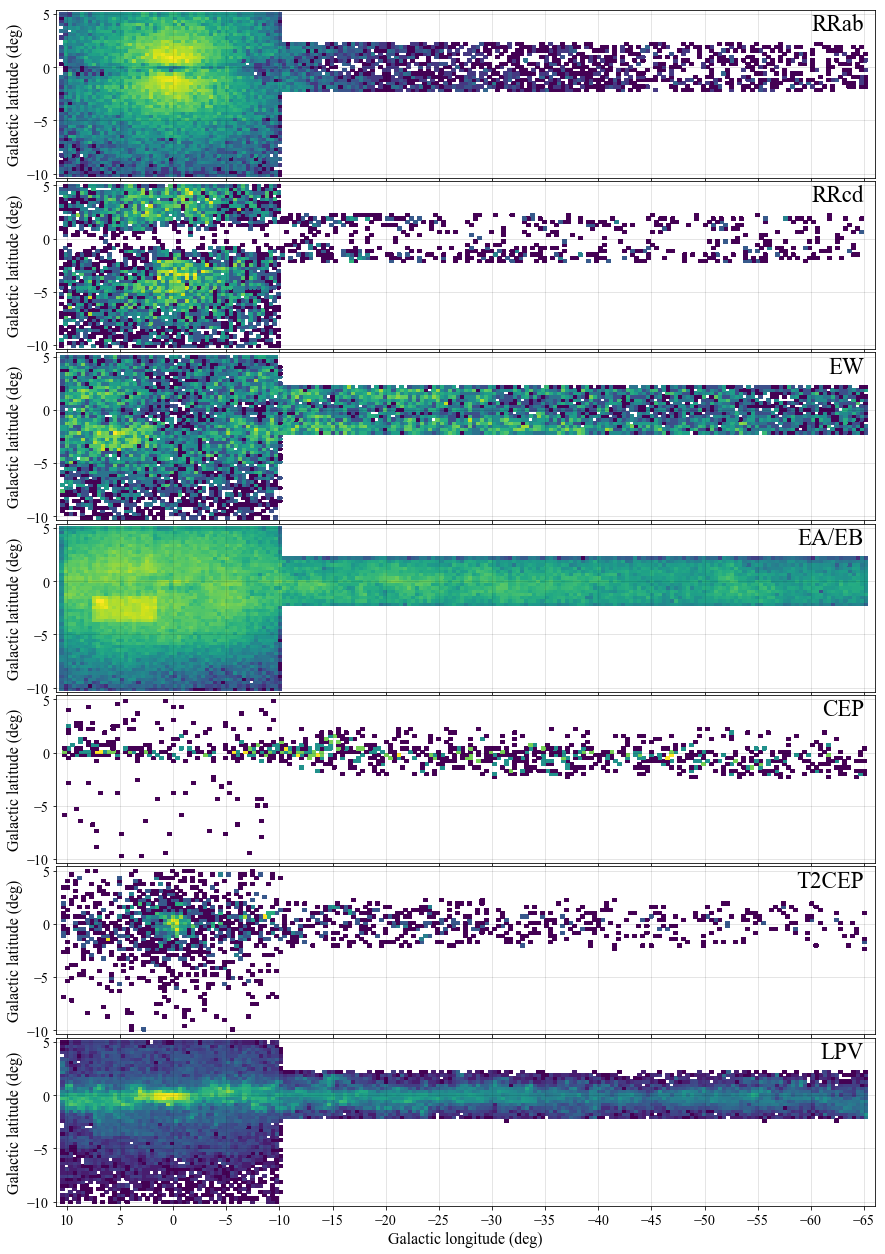

In [15]:
f,a=plt.subplots(7,1,figsize=[15.,22.],sharex=True)
plt.subplots_adjust(hspace=0.02)
plt.sca(a[0])
onsky_plot(data,ff=f)
plt.sca(a[1])
onsky_plot(dataRRcd,label='RRcd',ff=f)
plt.sca(a[2])
onsky_plot(dataEW,label='EW',ff=f)
plt.sca(a[3])
onsky_plot(dataEAEB,label='EA/EB',ff=f)
plt.sca(a[4])
onsky_plot(data_pure_CEP,label='CEP',ff=f)
plt.sca(a[5])
onsky_plot(dataT2CEP,label='T2CEP',ff=f)
plt.sca(a[6])
onsky_plot(dataLPV,label='LPV',ff=f)
plt.xlabel('Galactic longitude (deg)')
plt.savefig('onsky_distributions.pdf',bbox_inches='tight')

In [4]:
import sqlutilpy
hc = pd.DataFrame(
         sqlutilpy.get('''
         select * from jason_sanders.virac2_variables where 
         l>2.417 and l<6.807 and b>-3.138 and b<-2.043''',
                    **config.wsdb_kwargs)
       )

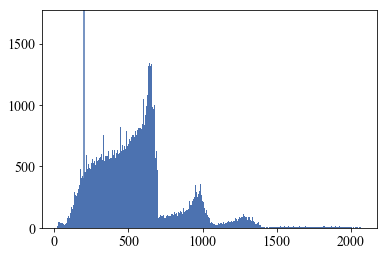

In [11]:
plt.hist(hc['ks_n_detections'],bins=500);
plt.axvline(200.)

27


<ErrorbarContainer object of 3 artists>

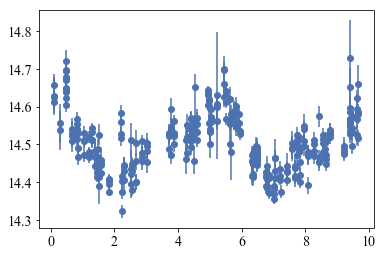

In [486]:
import sys
sys.path.append('../../../../mira_project/')
from find_analyse_variables import generate_results_gp, sigclipper

skk = SkyCoord(ra=data_pure_CEP['ra']*u.deg,dec=data_pure_CEP['dec']*u.deg).transform_to('galactic')

indx=np.argsort(data_pure_CEP['ks_ivw_mean_mag'][np.abs(skk.b.deg)>3.]).values[::-1][3]
print(indx)
lc=get_lightcurve(data_pure_CEP['sourceid'].values[np.abs(skk.b.deg)>3.][indx])
per=(data_pure_CEP['lsq_period'].values[np.abs(skk.b.deg)>3.][indx])
clean = (lc['filterid']==5)&(lc['ambiguous_match']==0)&(lc['ast_res_chisq']<11.829)&(~((lc['chi']>5.)&(lc['mag']<13.2)))
lc = sigclipper(lc[clean])
lc['error']=lc['emag']
plt.errorbar(lc['mjdobs']%(2.*per),lc['mag'],yerr=lc['emag'],fmt='o')

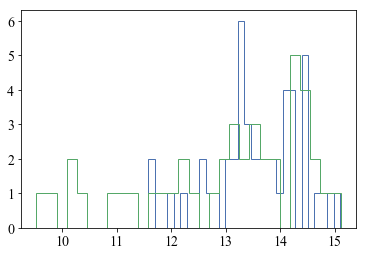

In [460]:
skk = SkyCoord(ra=data_pure_CEP['ra']*u.deg,dec=data_pure_CEP['dec']*u.deg).transform_to('galactic')

plt.hist(data_pure_CEP['ks_ivw_mean_mag'][np.abs(skk.b.deg)>3.],bins=30,histtype='step')

skk = SkyCoord(ra=data_train_CEP['ra']*u.deg,dec=data_train_CEP['dec']*u.deg).transform_to('galactic')

plt.hist(data_train_CEP['ks_ivw_mean_mag'][np.abs(skk.b.deg)>3.],bins=30,histtype='step');

(-10, 10)

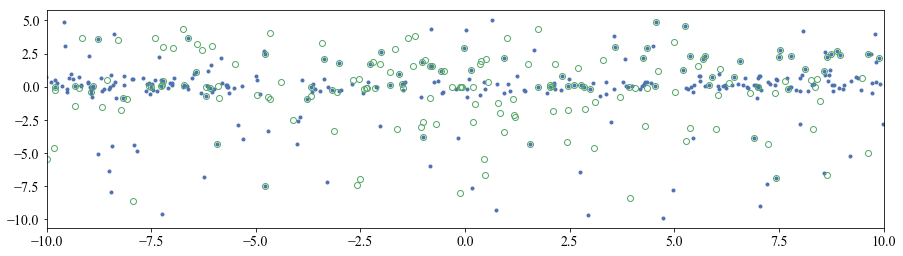

In [450]:
f=plt.figure(figsize=[15.,4.])
skk = SkyCoord(ra=data_pure_CEP['ra']*u.deg,dec=data_pure_CEP['dec']*u.deg).transform_to('galactic')
plt.plot(wrap(skk.l.deg),skk.b.deg,'.')

skk = SkyCoord(ra=data_train_CEP['ra']*u.deg,dec=data_train_CEP['dec']*u.deg).transform_to('galactic')
plt.plot(wrap(skk.l.deg),skk.b.deg,'o',mfc='None')

plt.xlim(-10,10)

In [534]:
row_norm??

Signature:
row_norm(
    x,
    y,
    cmap=<matplotlib.colors.LinearSegmentedColormap object at 0x7ff1385b7748>,
    per=[1.0, 99.0],
    norm=None,
    **kwargs,
)
Docstring: <no docstring>
Source:   
def row_norm(x,y,cmap=plt.cm.Greys,per=[1.,99.],norm=None,**kwargs):
    nn = np.histogram2d(x,y,**kwargs)
    XX = nn[0]/np.sum(nn[0],axis=0)
    XX[XX==0.]=np.nan
    im=plt.imshow(XX.T,
               origin='lower',extent=[nn[1][0],nn[1][-1],nn[2][0],nn[2][-1]],aspect='auto',
               vmin=np.nanpercentile(XX,per[0]),vmax=np.nanpercentile(XX,per[1]),cmap=cmap,norm=norm)
    return XX,nn[1],nn[2],im
File:      ~/plotting_general.py
Type:      function


Text(0, 0.5, 'Prob')

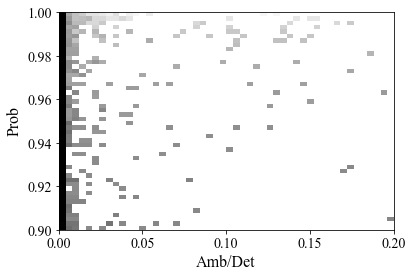

In [531]:
from plotting_general import row_norm
row_norm(data['ks_n_ambiguous']/data['ks_n_detections'],data['prob'],bins=50,norm=LogNorm(),range=[[0,0.2],[0.9,1.]]);
plt.xlabel('Amb/Det')
plt.ylabel('Prob')

Text(0, 0.5, 'Prob')

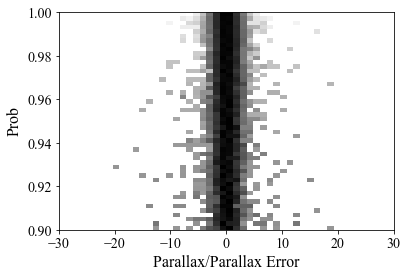

In [532]:
from plotting_general import row_norm
row_norm(data['parallax']/data['parallax_error'],data['prob'],bins=50,norm=LogNorm(),range=[[-30,30],[0.9,1.]]);
plt.xlabel('Parallax/Parallax Error')
plt.ylabel('Prob')

(0.0001, 1.0)

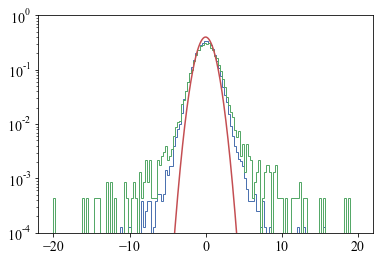

In [512]:
plt.hist((data['parallax']/data['parallax_error'])[data['prob']>0.99],bins=150,range=[-20,20],density=True,histtype='step');
plt.hist((data['parallax']/data['parallax_error'])[data['prob']<0.99],bins=150,range=[-20,20],density=True,histtype='step');
plt.semilogy()
xx = np.linspace(-20,20,1000)
plt.plot(xx, np.exp(-xx**2/2.)/np.sqrt(2.*np.pi))
plt.ylim(1e-4,1e0)

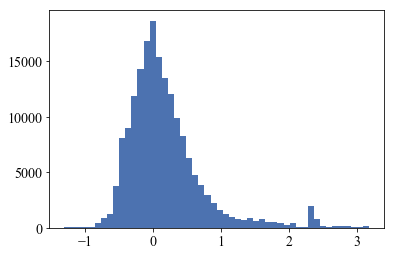

In [88]:
plt.hist(np.log10(dataEAEB['lsq_period'][dataEAEB['prob']>0.9]),bins=50);

In [466]:
import sys
sys.path.append('../')
from config import configuration
config = configuration()
config.request_password()

def get_lightcurve(sourceid):

    lcs = pd.DataFrame(sqlutilpy.get('''select sourceid, 
                                unnest(mjdobs) as mjdobs,
                                unnest(mag) as mag,
                                unnest(emag) as emag,
                                unnest(filterid) as filterid,
                                unnest(chi) as chi,
                                unnest(ast_res_chisq) as ast_res_chisq,
                                unnest(ambiguous_match) as ambiguous_match  
                                from leigh_smith.virac2_ts_tmolnar_variables where sourceid={0}'''.format(sourceid),
                     **config.wsdb_kwargs))
    
    return lcs


 ·············


In [142]:
sys.path.append('../../../../mira_project/')
sys.path.append('../../../../')
sys.path.append('../../../../variability/')
from find_analyse_variables import generate_results_gp, sigclipper
from gaussian_process import plot_lc_GP

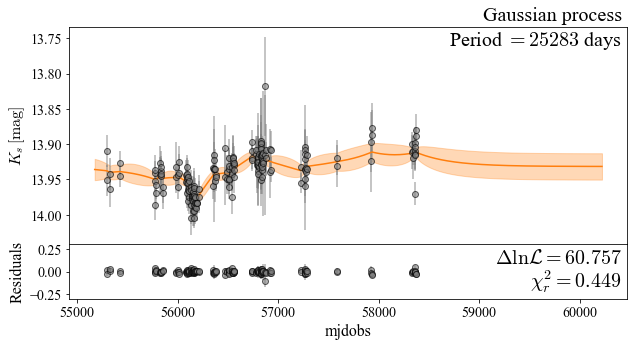

In [148]:
lc=get_lightcurve(8696838014143)
clean = (lc['filterid']==5)&(lc['ambiguous_match']==0)&(lc['ast_res_chisq']<11.829)&(~((lc['chi']>5.)&(lc['mag']<13.2)))
lc = sigclipper(lc[clean])
lc['error']=lc['emag']
if len(lc)>2:
    gpp,gpprops, lcprops, dll, dllG, rchi, delta_aic, delta_bic=generate_results_gp(lc,[128.])
    # gpp=run_gp_quick(lc, 298.,init_log_c=-10, n_sho=2)#, n_exp=1, n_sho=1)
    plot_lc_GP(lc, gpp);

In [144]:
dataLPV[['sourceid','l','b','lsq_period']][(dataLPV['lsq_period']>1300.)].values[5000:5005]

array([[8.69683801e+12, 7.46853291e+00, 5.83143491e-02, 1.49999250e+03],
       [8.69683801e+12, 7.44445979e+00, 6.32125107e-02, 1.49999250e+03],
       [8.69683801e+12, 7.45633958e+00, 6.34826060e-02, 1.49999250e+03],
       [8.69683801e+12, 7.44807505e+00, 1.05620745e-01, 1.49999250e+03],
       [8.69683802e+12, 7.47501442e+00, 5.12948719e-02, 1.49999250e+03]])

In [145]:
dataLPV[['sourceid']][(dataLPV['lsq_period']>1300.)].values[5000:5005]

array([[8696838008960],
       [8696838010098],
       [8696838011575],
       [8696838014143],
       [8696838023316]])

## RRL plots

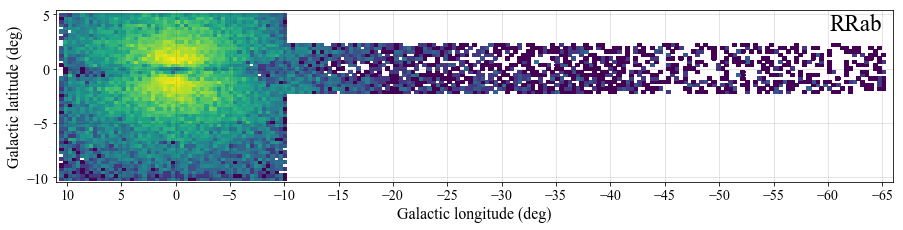

In [155]:
onsky_plot(data)

In [ ]:
1.041 − 0.57 ± 0.03 − 3.52 ± 0.30

In [ ]:
coeff=1.041
dist_rrab =np.power(10.,0.2*(
    data['h_ivw_mean_mag']-coeff*(data['j_ivw_mean_mag']- data['ks_ivw_mean_mag'])
    +3.52*np.log10(data['lsq_period']+0.3)+0.57)-2)

In [643]:
np.logical_xor(True, False)

True

In [19]:
def period_fix(var_in,tol=1.):

    period_out = var_in['lsq_period'].values.copy()

    period_out[((var_in['class']=='EA/EB')|(var_in['class']=='Ell'))&
                (var_in['amp_0']>tol*var_in['amp_1'])]*=2.
    
    ss=np.argmax([var_in['amp_0'].values,
                  var_in['amp_1'].values,
                  var_in['amp_2'].values,
                  var_in['amp_3'].values],axis=0)
    fltr = ~((var_in['class']=='EA/EB')|(var_in['class']=='Ell'))
    period_out[fltr]/=(1.+ss)[fltr]
    
    period_out[var_in['class']=='EW']*=2
    
    return period_out
    

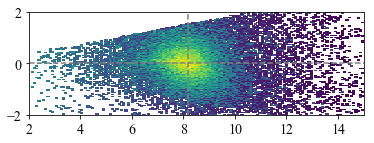

In [659]:
coeff=0.48
dist_rrab = np.power(10.,0.2*(
    data['ks_ivw_mean_mag']-coeff*(data['j_ivw_mean_mag']- data['ks_ivw_mean_mag'])
    +2.53*np.log10(data['lsq_period'])+1.03)-2)

coeff=1.041 #1.041
dist_rrab =np.power(10.,0.2*(
    data['h_ivw_mean_mag']-coeff*(data['j_ivw_mean_mag']- data['ks_ivw_mean_mag'])
    +3.52*(np.log10(data['lsq_period'])+0.3)+0.57)-2)

# coeff=1.618
# dist_rrab =np.power(10.,0.2*(
#     data['h_ivw_mean_mag']-coeff*(data['j_ivw_mean_mag']- data['h_ivw_mean_mag'])
#     +3.66*(np.log10(data['lsq_period'])+0.3)+0.6)-2)

# FU Ks0 17.360 0.005 −2.84 0.02 0.14 16 897
# FU J0  17.699 0.005 −2.50 0.02 0.15 16 868

coeff=0.44
dist_rrab = np.power(10.,0.2*(
    data['ks_ivw_mean_mag']-coeff*(data['j_ivw_mean_mag']- data['ks_ivw_mean_mag'])
    +(2.84-coeff*(2.5-2.84))*np.log10(period_fix(data))
    +18.476-(17.36-coeff*(17.699-17.36)))-2)


plt.hist2d(dist_rrab*np.cos(np.deg2rad(data['l']))*np.cos(np.deg2rad(data['b'])),
          dist_rrab*np.sin(np.deg2rad(data['l']))*np.cos(np.deg2rad(data['b'])),
          range=[[2,15],[-2,2]],bins=150,norm=LogNorm(),
          weights=1./dist_rrab);
plt.axvline(8.18,ls='dashed',color='gray')
plt.axhline(0.,ls='dashed',color='gray')
plt.gca().set_aspect('equal')

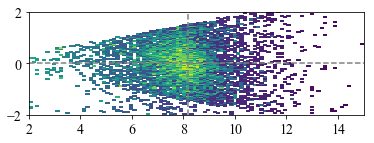

In [660]:
# FO Ks0 16.860 0.023 −2.98 0.05 0.17 5236
# FO J0  17.241 0.022 −2.53 0.04

coeff=0.43
dist_rrcd = np.power(10.,0.2*(
    dataRRcd['ks_ivw_mean_mag']-coeff*(dataRRcd['j_ivw_mean_mag']- dataRRcd['ks_ivw_mean_mag'])
    +(2.98-coeff*(2.53-2.98))*np.log10(period_fix(dataRRcd))
    +18.476-(16.86-coeff*(17.241-16.86)))-2)

plt.hist2d(dist_rrcd*np.cos(np.deg2rad(dataRRcd['l']))*np.cos(np.deg2rad(dataRRcd['b'])),
          dist_rrcd*np.sin(np.deg2rad(dataRRcd['l']))*np.cos(np.deg2rad(dataRRcd['b'])),
          range=[[2,15],[-2,2]],bins=100,norm=LogNorm(),
          weights=1./dist_rrcd);
plt.axvline(8.18,ls='dashed',color='gray')
plt.axhline(0.,ls='dashed',color='gray')
plt.gca().set_aspect('equal')

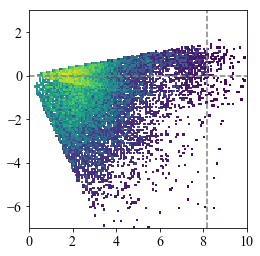

In [248]:
# J 183 −6.87 ± 0.25 −0.04 ± 0.11 0.23
# H 183 −5.99 ± 0.21 0.05 ± 0.10 0.20
# Ks 183 −5.95 ± 0.21 0.00 ± 0.09 0.19

coeff=0.44
dist_ew = np.power(10.,0.2*(
    dataEW['ks_ivw_mean_mag']-coeff*(dataEW['j_ivw_mean_mag']- dataEW['ks_ivw_mean_mag'])
    +(5.95-coeff*(6.87-5.95))*np.log10(period_fix(dataEW))
    +(0.-coeff*(0.04-0.)))-2)

plt.hist2d(dist_ew*np.cos(np.deg2rad(dataEW['l']))*np.cos(np.deg2rad(dataEW['b'])),
          dist_ew*np.sin(np.deg2rad(dataEW['l']))*np.cos(np.deg2rad(dataEW['b'])),
          range=[[0,10],[-7,3]],bins=150,norm=LogNorm(),
          weights=1./dist_ew
          );
plt.axvline(8.18,ls='dashed',color='gray')
plt.axhline(0.,ls='dashed',color='gray')
plt.gca().set_aspect('equal')

In [249]:
len(dataEW)

16867

In [31]:
import sys
sys.path.append('../../../../')
from pm_transform import ml_mb
data = ml_mb(data)

In [32]:
from pm_transform import ml_mb
dataRRcd = ml_mb(dataRRcd)

31.63219398677896 5.645978705246105 8.57623372349292
32.3173232914294 3.973354539092706 8.401962573553613
42.03067893872525 2.8224706005802305 8.272860068141174
42.81252852502596 2.489464739917568 8.331330175979694


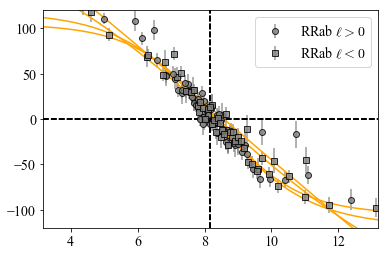

In [33]:
from plotting_general import running_median

limits = (dataRRcd['l']>0.)&(dataRRcd['l']<10.)#&(np.abs(dataRRcd['b'])<5.)
# limits = (data['l']>350.)&(data['l']<360.)
rr = running_median(dist_rrcd[limits]*np.cos(np.deg2rad(dataRRcd['l']))*np.cos(np.deg2rad(dataRRcd['b'])), 
                    (4.74*(dataRRcd['pml'])*dist_rrcd)[limits]+6.411*8.178*4.74,
                    nbins=20,equal_counts=True,percentiles=[.5,98.])
xx = np.linspace(2.,14.)
plt.xlim(8.178-4.,8.178+4.)
plt.ylim(-150.,150.)

from scipy.optimize import curve_fit
pp=curve_fit(lambda x,p1,p2,p3: -p1*np.tanh(p2*(x-p3))/p2,rr[0],rr[1],
         p0=[37.,.3,8.18],sigma=(rr[3]-rr[2])/np.sqrt(rr[-1])*np.sqrt(np.pi/2.))
scl=.3
plt.plot(xx, -pp[0][0]*np.tanh(pp[0][1]*(xx-pp[0][2]))/pp[0][1],
        color='#FFA500')
print(pp[0][0],np.sqrt(pp[1][0][0]),pp[0][2])
plt.axvline(8.178,color='k',ls='dashed')
plt.axhline(0.,color='k',ls='dashed')
plt.errorbar(rr[0],rr[1],yerr=.5*(rr[3]-rr[2])/np.sqrt(rr[-1])*np.sqrt(np.pi/2.),fmt='o',
            alpha=0.8,color='gray',mec='k')

from plotting_general import running_median
limits = (dataRRcd['l']>350.)&(dataRRcd['l']<360.)
rr = running_median(dist_rrcd[limits]*np.cos(np.deg2rad(dataRRcd['l']))*np.cos(np.deg2rad(dataRRcd['b'])), 
                    (4.74*(dataRRcd['pml'])*dist_rrcd)[limits]+6.411*8.178*4.74,
                    nbins=20,equal_counts=True,percentiles=[.5,98.])
xx = np.linspace(2.,14.)
plt.xlim(8.178-5.,8.178+5.)
plt.ylim(-150.,150.)

from scipy.optimize import curve_fit
pp=curve_fit(lambda x,p1,p2,p3: -p1*np.tanh(p2*(x-p3))/p2,rr[0],rr[1],
         p0=[37.,.3,8.18],sigma=(rr[3]-rr[2])/np.sqrt(rr[-1])*np.sqrt(np.pi/2.))
scl=.3
plt.plot(xx, -pp[0][0]*np.tanh(pp[0][1]*(xx-pp[0][2]))/pp[0][1],
        color='#FFA500')
print(pp[0][0],np.sqrt(pp[1][0][0]),pp[0][2])
plt.axvline(8.178,color='k',ls='dashed')
plt.axhline(0.,color='k',ls='dashed')
plt.errorbar(rr[0],rr[1],yerr=.5*(rr[3]-rr[2])/np.sqrt(rr[-1])*np.sqrt(np.pi/2.),fmt='s',
            alpha=0.8,color='gray',mec='k')


from plotting_general import running_median

coeff=0.43
corr=-0.0
dist_rrab = np.power(10.,0.2*(
    data['ks_ivw_mean_mag']-coeff*(data['j_ivw_mean_mag']- data['ks_ivw_mean_mag'])
    +(2.84-coeff*(2.5-2.84))*np.log10(period_fix(data))
    +18.476-(17.36-coeff*(17.699-17.36))+corr)-2)


limits = ((data['l']<5.)|(data['l']>355.))
limits = (data['l']>0.)&(data['l']<10.)&(np.abs(data['b'])<5.)
# limits = (data['l']>350.)&(data['l']<360.)
rr = running_median(dist_rrab[limits]*np.cos(np.deg2rad(data['l']))*np.cos(np.deg2rad(data['b'])), 
                    (4.74*(data['pml'])*dist_rrab)[limits]+6.411*8.178*4.74,
                    nbins=40,equal_counts=True,percentiles=[.5,98.])
xx = np.linspace(2.,14.)
plt.xlim(8.178-4.,8.178+4.)
plt.ylim(-150.,150.)

from scipy.optimize import curve_fit
pp=curve_fit(lambda x,p1,p2,p3: -p1*np.tanh(p2*(x-p3))/p2,rr[0],rr[1],
         p0=[37.,.3,8.18],sigma=(rr[3]-rr[2])/np.sqrt(rr[-1])*np.sqrt(np.pi/2.))
scl=.3
plt.plot(xx, -pp[0][0]*np.tanh(pp[0][1]*(xx-pp[0][2]))/pp[0][1],
        color='#FFA500')
print(pp[0][0],np.sqrt(pp[1][0][0]),pp[0][2])
plt.axvline(8.178,color='k',ls='dashed')
plt.axhline(0.,color='k',ls='dashed')
plt.errorbar(rr[0],rr[1],yerr=.5*(rr[3]-rr[2])/np.sqrt(rr[-1])*np.sqrt(np.pi/2.),fmt='o',
            alpha=0.8,color='gray',mec='k',label='RRab $\ell>0$')


from plotting_general import running_median
limits = ((data['l']<5.)|(data['l']>355.))
limits = (data['l']>0.)&(data['l']<10.)
limits = (data['l']>350.)&(data['l']<360.)
rr = running_median(dist_rrab[limits]*np.cos(np.deg2rad(data['l']))*np.cos(np.deg2rad(data['b'])), 
                    (4.74*(data['pml'])*dist_rrab)[limits]+6.411*8.178*4.74,
                    nbins=40,equal_counts=True,percentiles=[.5,98.])
xx = np.linspace(2.,14.)
plt.xlim(8.178-5.,8.178+5.)
plt.ylim(-120.,120.)

from scipy.optimize import curve_fit
pp=curve_fit(lambda x,p1,p2,p3: -p1*np.tanh(p2*(x-p3))/p2,rr[0],rr[1],
         p0=[37.,.3,8.18],sigma=(rr[3]-rr[2])/np.sqrt(rr[-1])*np.sqrt(np.pi/2.))
scl=.3
plt.plot(xx, -pp[0][0]*np.tanh(pp[0][1]*(xx-pp[0][2]))/pp[0][1],
        color='#FFA500')
print(pp[0][0],np.sqrt(pp[1][0][0]),pp[0][2])
plt.axvline(8.178,color='k',ls='dashed')
plt.axhline(0.,color='k',ls='dashed')
plt.errorbar(rr[0],rr[1],yerr=.5*(rr[3]-rr[2])/np.sqrt(rr[-1])*np.sqrt(np.pi/2.),fmt='s',
            alpha=0.8,color='gray',mec='k',label='RRab $\ell<0$')
plt.legend()

39.66750347430828 2.526099095021933 8.26570694329314
42.83667084199411 2.4169442124750753 8.328093152011332


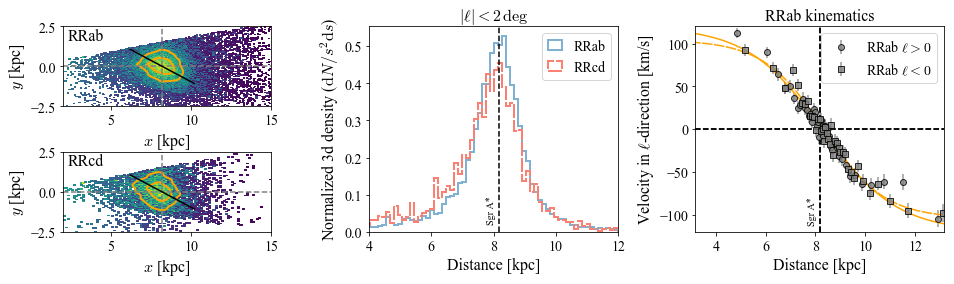

In [34]:
fig3 = plt.figure(figsize=[13.5,4.])
gs = fig3.add_gridspec(2,3)
f3_ax1 = fig3.add_subplot(gs[0, 0])
from scipy.ndimage import gaussian_filter

coeff=0.428
corr=0.
dist_rrab = np.power(10.,0.2*(
    data['ks_ivw_mean_mag']-coeff*(data['j_ivw_mean_mag']- data['ks_ivw_mean_mag'])
    +(2.84-coeff*(2.5-2.84))*np.log10(period_fix(data))
    +18.476-(17.36-coeff*(17.699-17.36))+corr)-2)

plt.hist2d(dist_rrab*np.cos(np.deg2rad(data['l']))*np.cos(np.deg2rad(data['b'])),
          dist_rrab*np.sin(np.deg2rad(data['l']))*np.cos(np.deg2rad(data['b'])),
          range=[[2,15],[-2.5,2.5]],bins=150,norm=LogNorm(),
          weights=1./dist_rrab,rasterized=True);

nn,x,y=np.histogram2d(dist_rrab*np.cos(np.deg2rad(data['l']))*np.cos(np.deg2rad(data['b'])),
          dist_rrab*np.sin(np.deg2rad(data['l']))*np.cos(np.deg2rad(data['b'])),
          range=[[2,15],[-2.5,2.5]],bins=150,
          weights=1./dist_rrab)

nn=gaussian_filter(nn.T,2.)
c = plt.contour(.5*(x[1:]+x[:-1]),.5*(y[1:]+y[:-1]),nn,
                     origin='lower',
                colors='#FFA500',
                     contours=10,
                       levels=[np.max(nn)/5.,np.max(nn)/2.],
               linewidths=2.)
plt.annotate('RRab', xy=(0.02,0.98),xycoords='axes fraction',fontsize=16,ha='left',va='top')
plt.axvline(8.18,ls='dashed',color='gray')
plt.axhline(0.,ls='dashed',color='gray')
plt.gca().set_aspect('equal')
xx = np.linspace(8.178-2.,8.178+2.)
plt.plot(xx, -np.tan(28./180*np.pi)*(xx-8.178),color='K')
plt.xlabel('$x$ [kpc]')
plt.ylabel('$y$ [kpc]')

f3_ax1 = fig3.add_subplot(gs[1, 0])

coeff=0.428
dist_rrcd = np.power(10.,0.2*(
    dataRRcd['ks_ivw_mean_mag']-coeff*(dataRRcd['j_ivw_mean_mag']- dataRRcd['ks_ivw_mean_mag'])
    +(2.98-coeff*(2.53-2.98))*np.log10(period_fix(dataRRcd))
    +18.476-(16.86-coeff*(17.241-16.86)))-2)


plt.hist2d(dist_rrcd*np.cos(np.deg2rad(dataRRcd['l']))*np.cos(np.deg2rad(dataRRcd['b'])),
          dist_rrcd*np.sin(np.deg2rad(dataRRcd['l']))*np.cos(np.deg2rad(dataRRcd['b'])),
          range=[[2,15],[-2.5,2.5]],bins=100,norm=LogNorm(),
          weights=1./dist_rrcd,rasterized=True);

nn,x,y=np.histogram2d(dist_rrcd*np.cos(np.deg2rad(dataRRcd['l']))*np.cos(np.deg2rad(dataRRcd['b'])),
          dist_rrcd*np.sin(np.deg2rad(dataRRcd['l']))*np.cos(np.deg2rad(dataRRcd['b'])),
          range=[[2,15],[-2.5,2.5]],bins=100,
          weights=1./dist_rrcd)
nn=gaussian_filter(nn.T,2.)
c = plt.contour(.5*(x[1:]+x[:-1]),.5*(y[1:]+y[:-1]),nn,
                     origin='lower',
                colors='#FFA500',
                     contours=10,
                       levels=[np.max(nn)/3.,np.max(nn)/1.5],
               linewidths=2.)
plt.annotate('RRcd', xy=(0.02,0.98),xycoords='axes fraction',fontsize=16,ha='left',va='top')
plt.xlabel('$x$ [kpc]')
plt.ylabel('$y$ [kpc]')

plt.axvline(8.18,ls='dashed',color='gray')
plt.axhline(0.,ls='dashed',color='gray')
plt.gca().set_aspect('equal')
xx = np.linspace(8.178-2.,8.178+2.)
plt.plot(xx, -np.tan(28./180*np.pi)*(xx-8.178),color='K')

f3_ax1 = fig3.add_subplot(gs[:, 1])
import seaborn as sns
limits = ((data['l']<2.)|(data['l']>358.))
plt.hist(dist_rrab[limits],bins=70,range=[3.,12.],weights=1./dist_rrab[limits]**2,
        histtype='step',density=True,label='RRab',lw=2,
        color=sns.color_palette('Set3')[4]);
limits = ((dataRRcd['l']<2.)|(dataRRcd['l']>358.))
plt.hist(dist_rrcd[limits],bins=70,range=[3.,12.],weights=1./dist_rrcd[limits]**2,
        histtype='step',density=True,label='RRcd',lw=2,
        color=sns.color_palette('Set3')[3],ls=(0,(7,1)));
plt.legend(handlelength=1)
plt.xlim(4.,12.)
plt.axvline(8.178,ls='dashed',color='k')
plt.annotate('Sgr A*', xy=(8.078,0.02),rotation=90,va='bottom',ha='right')
plt.xlabel('Distance [kpc]')
plt.ylabel('Normalized 3d density ($\mathrm{d}N/s^2\mathrm{d}s$)')
plt.title(r'$|\ell|<2\,\mathrm{deg}$',fontsize=16)
from plotting_general import running_median

f3_ax1 = fig3.add_subplot(gs[:, 2])
coeff=0.428
corr=-0.0
dist_rrab = np.power(10.,0.2*(
    data['ks_ivw_mean_mag']-coeff*(data['j_ivw_mean_mag']- data['ks_ivw_mean_mag'])
    +(2.84-coeff*(2.5-2.84))*np.log10(period_fix(data))
    +18.476-(17.36-coeff*(17.699-17.36))+corr)-2)


limits = ((data['l']<5.)|(data['l']>355.))
limits = (data['l']>0.)&(data['l']<10.)#&(np.abs(data['b'])<5.)
# limits = (data['l']>350.)&(data['l']<360.)
rr = running_median(dist_rrab[limits]*np.cos(np.deg2rad(data['l']))*np.cos(np.deg2rad(data['b'])), 
                    (4.74*(data['pml'])*dist_rrab)[limits]+6.411*8.178*4.74,
                    nbins=40,equal_counts=True,percentiles=[.5,98.])
xx = np.linspace(2.,14.)
plt.xlim(8.178-4.,8.178+4.)
plt.ylim(-150.,150.)

from scipy.optimize import curve_fit
pp=curve_fit(lambda x,p1,p2,p3: -p1*np.tanh(p2*(x-p3))/p2,rr[0],rr[1],
         p0=[37.,.3,8.18],sigma=(rr[3]-rr[2])/np.sqrt(rr[-1])*np.sqrt(np.pi/2.))
scl=.3
plt.plot(xx, -pp[0][0]*np.tanh(pp[0][1]*(xx-pp[0][2]))/pp[0][1],
        color='#FFA500')
print(pp[0][0],np.sqrt(pp[1][0][0]),pp[0][2])
plt.axvline(8.178,color='k',ls='dashed')
plt.axhline(0.,color='k',ls='dashed')
plt.errorbar(rr[0],rr[1],yerr=.5*(rr[3]-rr[2])/np.sqrt(rr[-1])*np.sqrt(np.pi/2.),fmt='o',
            alpha=0.8,color='gray',mec='k',label='RRab $\ell>0$')


from plotting_general import running_median
limits = ((data['l']<5.)|(data['l']>355.))
limits = (data['l']>0.)&(data['l']<10.)
limits = (data['l']>350.)&(data['l']<360.)
rr = running_median(dist_rrab[limits]*np.cos(np.deg2rad(data['l']))*np.cos(np.deg2rad(data['b'])), 
                    (4.74*(data['pml'])*dist_rrab)[limits]+6.411*8.178*4.74,
                    nbins=40,equal_counts=True,percentiles=[.5,98.])
xx = np.linspace(2.,14.)
plt.xlim(8.178-5.,8.178+5.)
plt.ylim(-120.,120.)

from scipy.optimize import curve_fit
pp=curve_fit(lambda x,p1,p2,p3: -p1*np.tanh(p2*(x-p3))/p2,rr[0],rr[1],
         p0=[37.,.3,8.18],sigma=(rr[3]-rr[2])/np.sqrt(rr[-1])*np.sqrt(np.pi/2.))
scl=.3
plt.plot(xx, -pp[0][0]*np.tanh(pp[0][1]*(xx-pp[0][2]))/pp[0][1],
        color='#FFA500',ls=(0,(7,1)))
print(pp[0][0],np.sqrt(pp[1][0][0]),pp[0][2])
plt.axvline(8.178,color='k',ls='dashed')
plt.annotate('Sgr A*', xy=(8.078,-112),rotation=90,va='bottom',ha='right')
plt.axhline(0.,color='k',ls='dashed')
plt.errorbar(rr[0],rr[1],yerr=.5*(rr[3]-rr[2])/np.sqrt(rr[-1])*np.sqrt(np.pi/2.),fmt='s',
            alpha=0.8,color='gray',mec='k',label='RRab $\ell<0$')
plt.legend()

plt.xlabel('Distance [kpc]')
plt.ylabel('Velocity in $\ell$-direction [km/s]');
plt.title('RRab kinematics',fontsize=16)
plt.tight_layout()
plt.savefig('rrab_illustration.pdf',bbox_inches='tight',dpi=300)

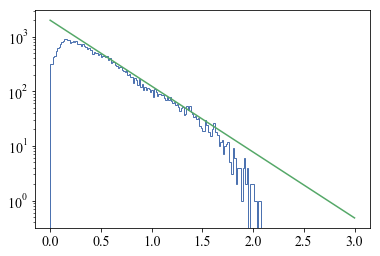

In [420]:
plt.hist(
    np.abs(dist_rrab*np.sin(np.deg2rad(data['b'])))
    [(dist_rrab>4.)&(dist_rrab<12.)],bins=150,histtype='step');
plt.semilogy()
xx = np.linspace(0.,3.)
plt.plot(xx, 2000.*np.exp(-xx/0.36))

In [81]:
def spread(sK,sJ,coeff,ecoeff,JK):
    return np.sqrt(sK**2*(1+coeff)**2+coeff**2*sJ**2+ecoeff**2*JK**2)

import pystan

stan_model = """
data{
    int<lower=1> Ndata;
    vector[Ndata] mag;
    vector[Ndata] emag;
    vector[Ndata] log10period;
    real ext_coeff;
    real a0;
    real b0;
    real a_spread;
    real b_spread;
}
parameters{
    real a;
    real b;
    real mean_mag;
    real<lower=0> width_mag;
    real mean_mag_outlier;
    real<lower=0> width_mag_outlier;
    real<lower=0, upper=1> lambda;
}
model{
    mag ~ normal(a * log10period + b + mean_mag, sqrt(emag .* emag + width_mag * width_mag));
    for (n in 1:Ndata)
      target += log_mix(lambda,
                        normal_lpdf(mag[n] | a * log10period[n] + b + mean_mag, 
                            sqrt(emag[n] * emag[n] + width_mag * width_mag)),
                        normal_lpdf(mag[n] | a * log10period[n] + b + mean_mag_outlier, 
                            sqrt(emag[n] * emag[n] + width_mag_outlier * width_mag_outlier)));
    // target += 3./2.1714724095 * (mag - (a * log10period + b));
    a ~ normal(a0, a_spread);
    b ~ normal(b0, b_spread);
}

"""

model_stan = pystan.StanModel(model_code=stan_model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_1c7163d1ca0500c7ed791c207ff680d6 NOW.


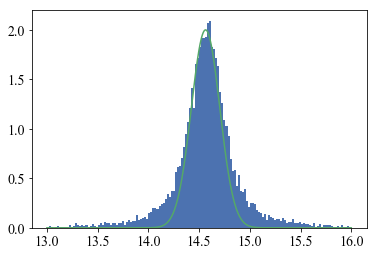

In [71]:
plt.hist(data_dict()['mag']-(data_dict()['a0']*data_dict()['log10period']+data_dict()['b0']),
         bins=150,range=[13,16],
        weights=1./(data_dict()['mag']-(data_dict()['a0']*data_dict()['log10period']+data_dict()['b0']))**3,density=True);
xx = np.linspace(13.,16.,1000)
plt.plot(xx, np.exp(-(xx-5.*np.log10(818.))**2/0.14**2/2.)*2.)

In [82]:
# FU Ks0 17.360 0.005 −2.84 0.02 0.14 16 897
# FO Ks0 16.860 0.023 −2.98 0.05 0.17 5236
# Glob Ks0 17.430 0.004 −2.53 0.01 0.15 22 122

# FU J0 17.699 0.005 −2.50 0.02 0.15 16 868
# FO J0 17.241 0.022 −2.53 0.04 0.17 5225
# Glob J0 17.800 0.004 −2.00 0.01 0.16 22 087

# dist_rrab = np.power(10.,0.2*(
#     data['ks_ivw_mean_mag']-coeff*(data['j_ivw_mean_mag']- data['ks_ivw_mean_mag'])
#     +(2.84-coeff*(2.5-2.84))*np.log10(period_fix(data))
#     +18.476-(17.36-coeff*(17.699-17.36))+corr)-2)

def data_dict():
    
    coeff = 0.44
    ecoeff = 0.0#4
    limits = ((data['l']<2.)|(data['l']>358.))&(data['j_ivw_err_mag']>0)
    mag = (data['ks_ivw_mean_mag']-coeff*(data['j_ivw_mean_mag']- data['ks_ivw_mean_mag']))[limits].values
    emag = spread(data['ks_ivw_err_mag'].values,data['j_ivw_err_mag'].values,coeff,ecoeff,
                  (data['j_ivw_mean_mag']- data['ks_ivw_mean_mag']).values)[limits]
    l10p = np.log10(period_fix(data)[limits])
    a0 = -(2.84-coeff*(2.5-2.84))
    aspread = spread(0.02,0.02,coeff,ecoeff,2.5-2.84)
    b0 = -(18.476-(17.36-coeff*(17.699-17.36)))
    bspread = spread(0.005,0.005,coeff,ecoeff,17.699-17.36) ## No spread from position of LMC

#     emag = np.sqrt(emag**2+np.sqrt(0.14**2*(1+coeff)**2+coeff**2*0.15**2))
#     emag = np.sqrt(emag**2+0.14**2)

    return {'Ndata':len(mag),'mag':mag, 'emag':emag,'log10period':l10p,'ext_coeff':coeff,
            'a0':a0,'b0':b0,'a_spread':aspread,'b_spread':bspread}
def initfn():
    coeff=0.44
    a0 = -(2.84-coeff*(2.5-2.84))
    b0 = -(18.476-(17.36-coeff*(17.699-17.36)))
    return {'a':a0,'b':b0,'mean_mag':5*np.log10(818.),'width_mag':0.15,
            'mean_mag_outlier':5*np.log10(818.),'width_mag':0.65,'lambda':0.03}

samps=model_stan.sampling(data=data_dict(),
                          warmup=300,
                          iter=1000,
                          chains=4,
                          n_jobs=12,
                          init=initfn)

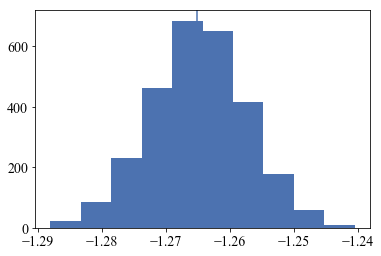

In [83]:
plt.hist(samps.extract()['b'])
plt.axvline(-(18.476-(17.36-0.44*(17.699-17.36))))

(array([  8.,  50., 216., 482., 800., 701., 376., 138.,  26.,   3.]),
 array([0.44379573, 0.45161928, 0.45944283, 0.46726638, 0.47508992,
        0.48291347, 0.49073702, 0.49856057, 0.50638411, 0.51420766,
        0.52203121]),
 <a list of 10 Patch objects>)

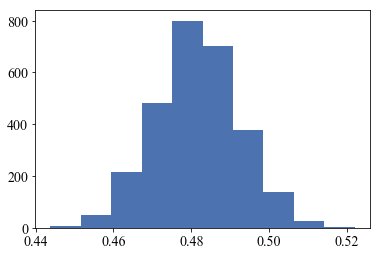

In [86]:
plt.hist(samps.extract()['lambda'])

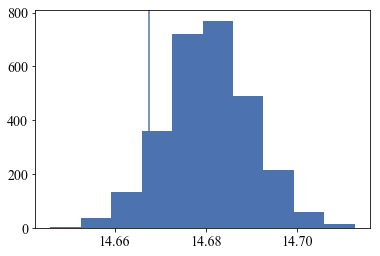

In [85]:
plt.hist(samps.extract()['mean_mag'])
plt.axvline(5.*np.log10(858.))

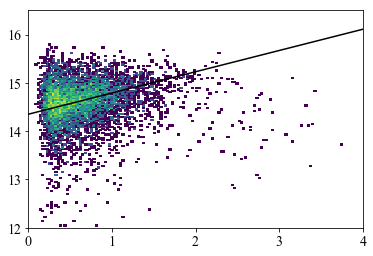

In [373]:
plt.hist2d(dataRRcd['j_ivw_mean_mag']-dataRRcd['ks_ivw_mean_mag'],
           dataRRcd['ks_ivw_mean_mag'],range=[[0.,4.],[12.,16.5]],bins=150,
           norm=LogNorm());
xx = np.linspace(0.,4.)
plt.plot(xx, 14.35+xx*0.44,color='k')

In [398]:
import sqlutilpy
data_lowprob = pd.DataFrame(
         sqlutilpy.get('''
         with p as (select * from thomas_molnar.virac2_variable_sources_eaeb where prob>0.8 and prob<1. and class='RRab')
         select p.*,v.l,v.b,v.j_ivw_mean_mag,v.h_ivw_mean_mag,
         v.ks_ivw_mean_mag,v.pmra,v.pmdec,v.ra,v.dec,
         v.pmra_error, v.pmdec_error, v.pmra_pmdec_corr from p inner join thomas_molnar.virac2_variable_data as v on p.sourceid=v.sourceid''',
                    **config.wsdb_kwargs)
       )

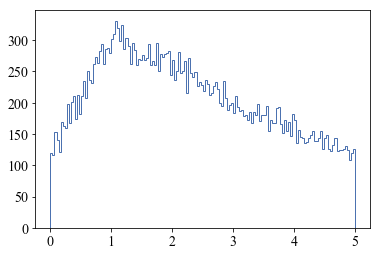

In [404]:
plt.hist(np.abs(data_lowprob['b'][(data_lowprob['l']<10.)|(data_lowprob['l']>350.)]),bins=150,
         histtype='step',range=[0.,5.]);

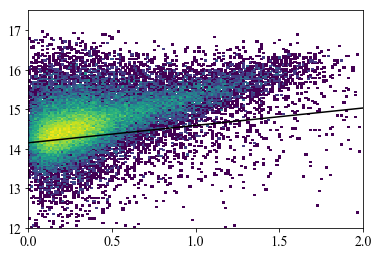

In [406]:
plt.hist2d(data_lowprob['h_ivw_mean_mag']-data_lowprob['ks_ivw_mean_mag'],
           data_lowprob['ks_ivw_mean_mag'],range=[[0.,2.],[12.,17.5]],bins=150,
          norm=LogNorm());
xx = np.linspace(0.,4.)
plt.plot(xx, 14.15+xx*0.44,color='k')

In [584]:
np.count_nonzero(np.isnan(data['j_ivw_mean_mag'])), len(data)

(619, 37767)

In [585]:
np.count_nonzero(np.isnan(data_allRRab['j_ivw_mean_mag'])), len(data_allRRab)

(3260, 58377)

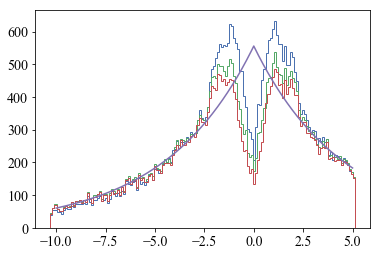

In [653]:
# fltr = (14.95+(data_allRRab['j_ivw_mean_mag']-data_allRRab['ks_ivw_mean_mag'])*0.44
#         *(1./0.44+1)>data_allRRab['j_ivw_mean_mag'])
# fltr &= (13.25+(data_allRRab['j_ivw_mean_mag']-data_allRRab['ks_ivw_mean_mag'])*0.44
#         *(1./0.44+1)<data_allRRab['j_ivw_mean_mag'])
fltr &= (data_allRRab['prob']>0.)
fltr &= (period_fix(data_allRRab)<0.9)
fltr &= (period_fix(data_allRRab)>0.3)
plt.hist(data_allRRab['b'][fltr&(wrap(data_allRRab['l'])<10.)],
         bins=150,histtype='step');
plt.hist(data['b'][wrap(data['l'])<10.],bins=150,histtype='step');
plt.hist(data['b'][(wrap(data['l'])<10.)&(data['prob']>0.95)],bins=150,histtype='step');
xx = np.linspace(-10,5,1000)
scl=4.5
plt.plot(xx, np.exp(-np.abs(xx)/scl)*2500/scl)

In [700]:
from virac_utils import cm_wise
from variability.wise_lc import load_wise_lc
from variability.lc_utils import plot_lightcurve, plot_periodogram, LombScargle

In [716]:
data_allRRab[['lsq_period']][(wss['w1']>0)&(data_allRRab['prob']>0.99)]

,lsq_period
16,0.477875
44,0.552500
62,0.541360
234,0.586166
432,0.511356
619,0.547749
1122,0.606851
1426,0.476238
2507,0.582858
2625,0.631905


In [722]:
wss.columns

Index(['ra_', 'dec_', 'xid', 'w1mpro', 'w2mpro', 'w1sigmpro', 'w2sigmpro',
       'w3mpro', 'w4mpro', 'w3sigmpro', 'w4sigmpro', 'w1flg', 'w2flg', 'w3flg',
       'w4flg', 'ph_qual', 'cc_flags', 'ra', 'dec', 'dist', 'w1', 'w2',
       'w1_err', 'w2_err', 'w3', 'w4', 'w3_err', 'w4_err'],
      dtype='object')

In [714]:
wss[['ra','dec','w1','']][(wss['w1']>0)&(data_allRRab['prob']>0.99)]

,ra,dec,w1
16,267.281921,-17.846124,14.113
44,269.000766,-18.165212,13.204
62,268.943684,-18.305991,12.333
234,267.512015,-19.102827,13.864
432,267.046742,-19.554903,12.538
619,267.876402,-19.882428,10.863
1122,265.477604,-20.698861,13.495
1426,269.581834,-20.969879,12.485
2507,276.197655,-21.899857,13.397
2625,266.238011,-21.982784,11.712


In [664]:
wss=cm_wise(data_allRRab,radeccols=['ra','dec'])

In [715]:
wlc=load_wise_lc(182.628728,-61.054430,cmradius=0.5)

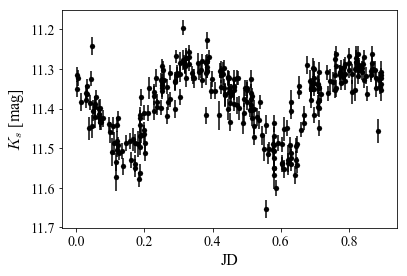

In [717]:
plot_lightcurve(wlc,period=0.451276)

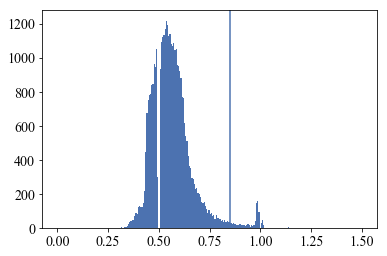

In [661]:
plt.hist(period_fix(data_allRRab)[data_allRRab['prob']>0.9],range=[0.,1.5],bins=250);
plt.axvline(0.85)

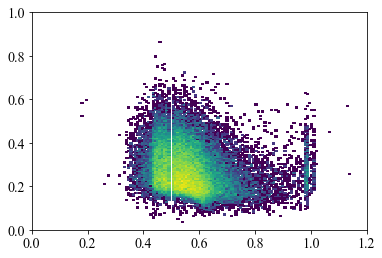

In [652]:
plt.hist2d(period_fix(data_allRRab)[data_allRRab['prob']>0.9],
           data_allRRab['amplitude'][data_allRRab['prob']>0.9],
           range=[[0.,1.2],[0.,1.]],bins=150,
          norm=LogNorm()
          );

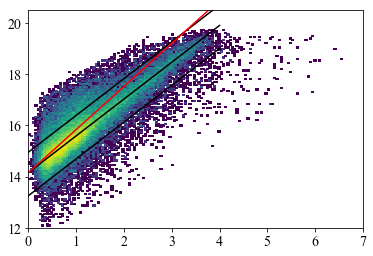

In [642]:
plt.hist2d((data_allRRab['j_ivw_mean_mag']-data_allRRab['ks_ivw_mean_mag'])[period_fix(data_allRRab)<0.9],
           data_allRRab['j_ivw_mean_mag'][period_fix(data_allRRab)<0.9],
           range=[[0.,7.],[12.,20.5]],bins=150,
          norm=LogNorm());
xx = np.linspace(0.,4.)
plt.plot(xx, 14.95+xx*0.44*(1./0.44+1),color='k')
plt.plot(xx, 14.15+xx*0.44*(1./0.44+1),color='k')
plt.plot(xx, 13.25+xx*0.44*(1./0.44+1),color='k')
plt.plot(xx, 14.15+xx*0.686*(1./0.686+1),color='r')

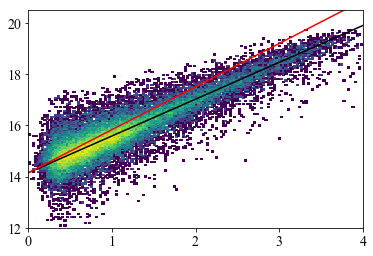

In [577]:
plt.hist2d(data['j_ivw_mean_mag']-data['ks_ivw_mean_mag'],data['j_ivw_mean_mag'],
           range=[[0.,4.],[12.,20.5]],bins=150,
          norm=LogNorm());
xx = np.linspace(0.,4.)
plt.plot(xx, 14.15+xx*0.44*(1./0.44+1),color='k')
plt.plot(xx, 14.15+xx*0.686*(1./0.686+1),color='r')

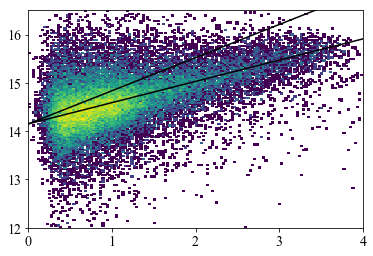

In [106]:
plt.hist2d(data['j_ivw_mean_mag']-data['ks_ivw_mean_mag'],data['ks_ivw_mean_mag'],range=[[0.,4.],[12.,16.5]],bins=150,
          norm=LogNorm());
xx = np.linspace(0.,4.)
plt.plot(xx, 14.15+xx*0.44,color='k')
plt.plot(xx, 14.15+xx*0.686,color='k')

In [410]:
np.count_nonzero(data['j_ivw_mean_mag']>0), len(data)

(37148, 37767)

(12.0, 16.2)

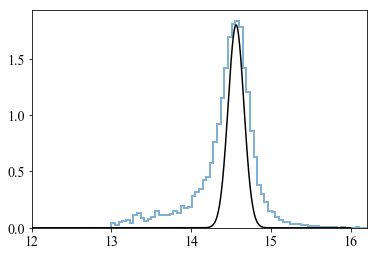

In [426]:
coeff=0.428
corr=0.
dm_rrab = (
    data['ks_ivw_mean_mag']-coeff*(data['j_ivw_mean_mag']- data['ks_ivw_mean_mag'])
    +(2.84-coeff*(2.5-2.84))*np.log10(period_fix(data))
    +18.476-(17.36-coeff*(17.699-17.36))+corr)

limits = ((data['l']<2.)|(data['l']>358.))
plt.hist(dm_rrab[limits],bins=70,range=[13.,16.2],weights=1./dist_rrab[limits]**3,
        histtype='step',density=True,label='RRab',lw=2,
        color=sns.color_palette('Set3')[4]);
xx = np.linspace(12.,16.,10000)
plt.plot(xx, np.exp(-(xx-5*np.log10(817.8))**2/0.14**2)*1.8+np.exp(-(xx-np.log10(617.8))**2/0.25**2)*0.6,color='k')
plt.xlim(12.,16.2)

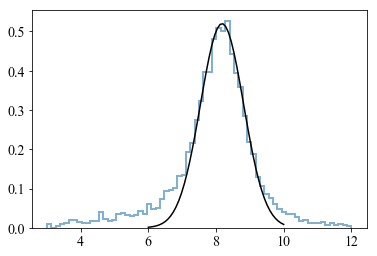

In [291]:
coeff=0.428
corr=0.
dist_rrab = np.power(10.,0.2*(
    data['ks_ivw_mean_mag']-coeff*(data['j_ivw_mean_mag']- data['ks_ivw_mean_mag'])
    +(2.84-coeff*(2.5-2.84))*np.log10(period_fix(data))
    +18.476-(17.36-coeff*(17.699-17.36))+corr)-2)

limits = ((data['l']<2.)|(data['l']>358.))
plt.hist(dist_rrab[limits],bins=70,range=[3.,12.],weights=1./dist_rrab[limits]**2,
        histtype='step',density=True,label='RRab',lw=2,
        color=sns.color_palette('Set3')[4]);
xx = np.linspace(6.,10.)
plt.plot(xx, np.exp(-(xx-8.178)**2/0.9**2)*0.52,color='k')

In [16]:
import sys
sys.path.append('../../../../')
from virac_utils import cm_gaia

In [17]:
gg = cm_gaia(dataEW, cm_radius=0.5, use_pm=True, epoch=2014.0)

In [20]:
coeff=0.428
# coeff=0.443
dist_ew = np.power(10.,0.2*(
    dataEW['ks_ivw_mean_mag']-coeff*(dataEW['j_ivw_mean_mag']- dataEW['ks_ivw_mean_mag'])
    +(5.94-coeff*(6.84-5.94))*np.log10(period_fix(dataEW))
    +(0.-coeff*(0.039-0.)))-2)

In [21]:
from zero_point import zpt
fltrG = (gg['astrometric_params_solved'].values>10.)&(gg['ruwe']<1.4)&(gg['astrometric_params_solved']==31)
fltrG &= (gg['phot_g_mean_mag']<21)&(((gg['nu_eff_used_in_astrometry']>1.1)&(gg['nu_eff_used_in_astrometry']<1.9))
                                     |((gg['pseudocolour']>1.24)&(gg['pseudocolour']<1.72)))
print(np.count_nonzero(fltrG))
# fltrG &= (dataEW['amp_double_3']<dataEW['amp_double_1']*(0.125+dataEW['amp_double_1']))
zpt.load_tables()
shifts=zpt.get_zpt(gg['phot_g_mean_mag'].values[fltrG], 
            gg['nu_eff_used_in_astrometry'].values[fltrG], 
            gg['pseudocolour'].values[fltrG], 
            gg['ecl_lat'].values[fltrG], 
            gg['astrometric_params_solved'].values[fltrG])


4568


In [22]:
from plotting_general import col_norm, running_median

In [23]:
import seaborn as sns

/home/jls/plotting_general.py:14: RuntimeWarning: invalid value encountered in true_divide
  XX = nn[0].T/np.sum(nn[0].T,axis=0)
/data/jls/python3.5/site-packages/matplotlib/colors.py:1028: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


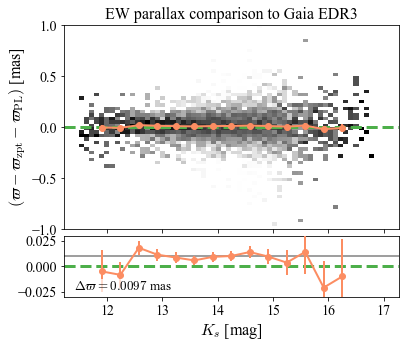

In [24]:
f,a=plt.subplots(2,1,sharex=True,figsize=[6.,5.],
                gridspec_kw={'height_ratios':[1.,0.3]})
plt.subplots_adjust(hspace=0.05)
plt.sca(a[0])
col_norm(dataEW['ks_ivw_mean_mag'][fltrG],
       gg['parallax'][fltrG]-shifts-1./dist_ew[fltrG],range=[[11.5,17],[-1.,1]],bins=60
         ,norm=LogNorm());
rr = running_median(dataEW['ks_ivw_mean_mag'][fltrG],gg['parallax'][fltrG]-shifts-1./dist_ew[fltrG])
plt.errorbar(rr[0],rr[1],.5*(rr[3]-rr[2])/np.sqrt(rr[-1])*np.sqrt(np.pi/2.)
             ,fmt='o-',color=sns.color_palette('Set2')[1],lw=2,zorder=10)
plt.axhline(color=sns.color_palette('Set1')[2],ls='dashed',lw=3)
# plt.xlabel(r'$K_s$ [mag]')
plt.ylabel(r'$(\varpi-\varpi_\mathrm{zpt}-\varpi_\mathrm{PL})$ [mas]')
plt.title('EW parallax comparison to Gaia EDR3',fontsize=16)
plt.ylim(-1.,1.)

plt.sca(a[1])
rr = running_median(dataEW['ks_ivw_mean_mag'][fltrG],gg['parallax'][fltrG]-shifts-1./dist_ew[fltrG])
plt.errorbar(rr[0],rr[1],.5*(rr[3]-rr[2])/np.sqrt(rr[-1])*np.sqrt(np.pi/2.)
             ,fmt='o-',color=sns.color_palette('Set2')[1],lw=2,zorder=10)
plt.axhline(np.nanmedian(gg['parallax'][fltrG]-shifts-1./dist_ew[fltrG]),color='gray')
t=plt.annotate(r'$\Delta\varpi=%0.4f$ mas'%np.nanmedian(gg['parallax'][fltrG]-shifts-1./dist_ew[fltrG]),
             fontsize=13,xy=(0.03,0.06),xycoords='axes fraction',
            ha='left',va='bottom',zorder=50)
plt.axhline(color=sns.color_palette('Set1')[2],ls='dashed',lw=3)
plt.xlabel(r'$K_s$ [mag]')
# plt.ylabel(r'$(\varpi-\varpi_\mathrm{zpt}-\varpi_\mathrm{PL})$ [mas]')
# plt.title('EW parallax comparison to Gaia EDR3',fontsize=16)
plt.ylim(-0.03,0.03)
# plt.ylim(-1.,1.)
t.set_bbox({'facecolor':'white', 'alpha':0.7,'edgecolor':'None','pad':1.})

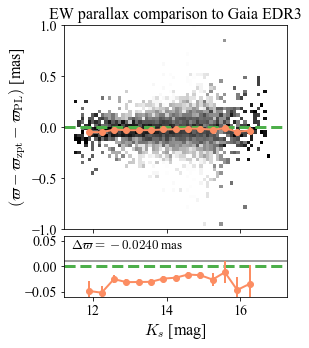

In [25]:
f,a=plt.subplots(2,1,sharex=True,figsize=[4.,5.],
                gridspec_kw={'height_ratios':[1.,0.3]})
plt.subplots_adjust(hspace=0.05)
plt.sca(a[0])
col_norm(dataEW['ks_ivw_mean_mag'][fltrG],
       gg['parallax'][fltrG]-0.*shifts-1./dist_ew[fltrG],range=[[11.5,17],[-1.,1]],bins=60
         ,norm=LogNorm());
rr = running_median(dataEW['ks_ivw_mean_mag'][fltrG],gg['parallax'][fltrG]-0.*shifts-1./dist_ew[fltrG])
plt.errorbar(rr[0],rr[1],.5*(rr[3]-rr[2])/np.sqrt(rr[-1])*np.sqrt(np.pi/2.)
             ,fmt='o-',color=sns.color_palette('Set2')[1],lw=2,zorder=10)
plt.axhline(color=sns.color_palette('Set1')[2],ls='dashed',lw=3)
# plt.xlabel(r'$K_s$ [mag]')
plt.ylabel(r'$(\varpi-\varpi_\mathrm{zpt}-\varpi_\mathrm{PL})$ [mas]')
plt.title('EW parallax comparison to Gaia EDR3',fontsize=16)
plt.ylim(-1.,1.)

plt.sca(a[1])
rr = running_median(dataEW['ks_ivw_mean_mag'][fltrG],gg['parallax'][fltrG]-0.*shifts-1./dist_ew[fltrG])
plt.errorbar(rr[0],rr[1],.5*(rr[3]-rr[2])/np.sqrt(rr[-1])*np.sqrt(np.pi/2.)
             ,fmt='o-',color=sns.color_palette('Set2')[1],lw=2,zorder=10)
plt.axhline(np.nanmedian(gg['parallax'][fltrG]-shifts-1./dist_ew[fltrG]),color='gray')
t=plt.annotate(r'$\Delta\varpi=%0.4f$ mas'%np.nanmedian(gg['parallax'][fltrG]-0.*shifts-1./dist_ew[fltrG]),
             fontsize=13,xy=(0.03,0.94),xycoords='axes fraction',
            ha='left',va='top',zorder=50)
plt.axhline(color=sns.color_palette('Set1')[2],ls='dashed',lw=3)
plt.xlabel(r'$K_s$ [mag]')
# plt.ylabel(r'$(\varpi-\varpi_\mathrm{zpt}-\varpi_\mathrm{PL})$ [mas]')
# plt.title('EW parallax comparison to Gaia EDR3',fontsize=16)
plt.ylim(-0.06,0.06)
# plt.ylim(-1.,1.)
t.set_bbox({'facecolor':'white', 'alpha':0.7,'edgecolor':'None','pad':1.})

In [26]:
fltrG = (gg['astrometric_params_solved'].values>10.)&(gg['ruwe']<1.4)&(gg['astrometric_params_solved']==31)
fltrG &= (gg['phot_g_mean_mag']<21)&(((gg['nu_eff_used_in_astrometry']>1.1)&(gg['nu_eff_used_in_astrometry']<1.9))
                                     |((gg['pseudocolour']>1.24)&(gg['pseudocolour']<1.72)))
fltrG &= (np.log10(period_fix(dataEW))>-0.55)&(np.log10(period_fix(dataEW))<-0.25)
#     fltrG &= np.abs(wrap(dataEW['l']))<10.
# fltrG &= (dataEW['amp_double_3']<dataEW['amp_double_1']*(0.125+dataEW['amp_double_1']))
zpt.load_tables()
shifts=zpt.get_zpt(gg['phot_g_mean_mag'].values[fltrG], 
            gg['nu_eff_used_in_astrometry'].values[fltrG], 
            gg['pseudocolour'].values[fltrG], 
            gg['ecl_lat'].values[fltrG], 
            gg['astrometric_params_solved'].values[fltrG])

print(np.nanmedian(gg['parallax'][fltrG]-True*shifts-1./dist_ew[fltrG]))
print(np.diff(np.nanpercentile(gg['parallax'][fltrG]-True*shifts-1./dist_ew[fltrG],[16.,84.]))*.5/np.sqrt(np.count_nonzero(fltrG))*np.sqrt(np.pi/2.))

print(np.nanmean(gg['parallax'][fltrG]-True*shifts-1./dist_ew[fltrG]))
print(np.std(gg['parallax'][fltrG]-True*shifts-1./dist_ew[fltrG])/np.sqrt(np.count_nonzero(fltrG)))

print(np.nanmedian(gg['parallax'][fltrG]-False*shifts-1./dist_ew[fltrG]))
print(np.diff(np.nanpercentile(gg['parallax'][fltrG]-False*shifts-1./dist_ew[fltrG],[16.,84.]))*.5/np.sqrt(np.count_nonzero(fltrG))*np.sqrt(np.pi/2.))

print(np.nanmean(gg['parallax'][fltrG]-False*shifts-1./dist_ew[fltrG]))
print(np.std(gg['parallax'][fltrG]-False*shifts-1./dist_ew[fltrG])/np.sqrt(np.count_nonzero(fltrG)))

0.005114151118570498
[0.00220888]
0.0014114479273817386
0.002336639664143746
-0.02872075179214545
[0.00224086]
-0.03089249986812145
0.0023416594352679656


In [27]:
fltrG = (gg['astrometric_params_solved'].values>10.)&(gg['ruwe']<1.4)&(gg['astrometric_params_solved']==95)
fltrG &= (gg['phot_g_mean_mag']<21)&(((gg['nu_eff_used_in_astrometry']>1.1)&(gg['nu_eff_used_in_astrometry']<1.9))
                                     |((gg['pseudocolour']>1.24)&(gg['pseudocolour']<1.72)))
fltrG &= (np.log10(period_fix(dataEW))>-0.55)&(np.log10(period_fix(dataEW))<-0.25)
#     fltrG &= np.abs(wrap(dataEW['l']))<10.
# fltrG &= (dataEW['amp_double_3']<dataEW['amp_double_1']*(0.125+dataEW['amp_double_1']))
zpt.load_tables()
shifts=zpt.get_zpt(gg['phot_g_mean_mag'].values[fltrG], 
            gg['nu_eff_used_in_astrometry'].values[fltrG], 
            gg['pseudocolour'].values[fltrG], 
            gg['ecl_lat'].values[fltrG], 
            gg['astrometric_params_solved'].values[fltrG])

print(np.nanmedian(gg['parallax'][fltrG]-True*shifts-1./dist_ew[fltrG]))
print(np.diff(np.nanpercentile(gg['parallax'][fltrG]-True*shifts-1./dist_ew[fltrG],[16.,84.]))*.5/np.sqrt(np.count_nonzero(fltrG))*np.sqrt(np.pi/2.))

print(np.nanmean(gg['parallax'][fltrG]-True*shifts-1./dist_ew[fltrG]))
print(np.std(gg['parallax'][fltrG]-True*shifts-1./dist_ew[fltrG])/np.sqrt(np.count_nonzero(fltrG)))

print(np.nanmedian(gg['parallax'][fltrG]-False*shifts-1./dist_ew[fltrG]))
print(np.diff(np.nanpercentile(gg['parallax'][fltrG]-False*shifts-1./dist_ew[fltrG],[16.,84.]))*.5/np.sqrt(np.count_nonzero(fltrG))*np.sqrt(np.pi/2.))

print(np.nanmean(gg['parallax'][fltrG]-False*shifts-1./dist_ew[fltrG]))
print(np.std(gg['parallax'][fltrG]-False*shifts-1./dist_ew[fltrG])/np.sqrt(np.count_nonzero(fltrG)))

0.0054458592253883165
[0.0052517]
0.009568386399171163
0.0070941926999423316
-0.021256414453979827
[0.00521337]
-0.011287300599677143
0.0070980953926887405


In [28]:
def wrap(l):
    return l-360.*(l>180.)
def running_zeropoint(astParams=31,filtr='phot_g_mean_mag',w_corr=True,nperbin=400):
    from zero_point import zpt
    fltrG = (gg['astrometric_params_solved'].values>10.)&(gg['ruwe']<1.4)&(gg['astrometric_params_solved']==astParams)
    fltrG &= (gg['phot_g_mean_mag']<21)&(((gg['nu_eff_used_in_astrometry']>1.1)&(gg['nu_eff_used_in_astrometry']<1.9))
                                         |((gg['pseudocolour']>1.24)&(gg['pseudocolour']<1.72)))
    fltrG &= (np.log10(period_fix(dataEW))>-0.55)&(np.log10(period_fix(dataEW))<-0.25)
#     fltrG &= np.abs(wrap(dataEW['l']))<10.
    # fltrG &= (dataEW['amp_double_3']<dataEW['amp_double_1']*(0.125+dataEW['amp_double_1']))
    zpt.load_tables()
    shifts=zpt.get_zpt(gg['phot_g_mean_mag'].values[fltrG], 
                gg['nu_eff_used_in_astrometry'].values[fltrG], 
                gg['pseudocolour'].values[fltrG], 
                gg['ecl_lat'].values[fltrG], 
                gg['astrometric_params_solved'].values[fltrG])

    return running_median(wrap(gg[filtr][fltrG]),gg['parallax'][fltrG]-w_corr*shifts-1./dist_ew[fltrG],equal_counts=True,
                         nbins=np.count_nonzero(fltrG)//nperbin)

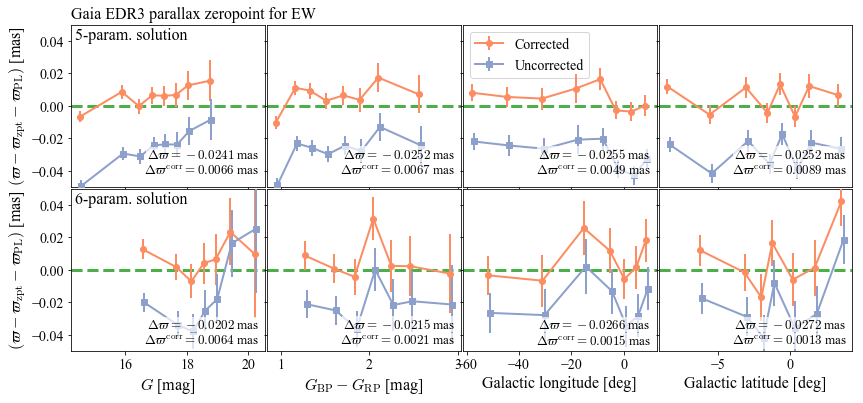

In [38]:
f,ax=plt.subplots(2,4,figsize=[14.,6.],sharex='col',sharey=True)
plt.subplots_adjust(wspace=0.01,hspace=0.01)
lbls = [r'$G$ [mag]',r'$G_\mathrm{BP}-G_\mathrm{RP}$ [mag]','Galactic longitude [deg]', 'Galactic latitude [deg]']
for ii, (bb,lbl) in enumerate(zip(['phot_g_mean_mag','bp_rp','l','b'],lbls)):
    a = ax[:,ii]
    plt.sca(a[0])
    rr = running_zeropoint(31,bb, True)
    plt.errorbar(rr[0],rr[1],.5*(rr[3]-rr[2])/np.sqrt(rr[-1])*np.sqrt(np.pi/2.)
                 ,fmt='o-',color=sns.color_palette('Set2')[1],lw=2,zorder=10,label='Corrected')

    # plt.axhline(np.median(rr[1]),color='gray')
    t=plt.annotate(r'$\Delta\varpi^\mathrm{corr}=%0.4f$ mas'%np.nanmedian(rr[1]),
                 fontsize=13,xy=(0.97,0.06),xycoords='axes fraction',
                ha='right',va='bottom',zorder=50)
    t.set_bbox({'facecolor':'white', 'alpha':0.7,'edgecolor':'None','pad':1.})

    rr = running_zeropoint(31, bb, False)
    plt.errorbar(rr[0]+np.median(np.diff(rr[0]))*0.1,rr[1],.5*(rr[3]-rr[2])/np.sqrt(rr[-1])*np.sqrt(np.pi/2.)
                 ,fmt='s-',color=sns.color_palette('Set2')[2],lw=2,zorder=10,label='Uncorrected')
    # plt.axhline(np.median(rr[1]),color='gray')
    t=plt.annotate(r'$\Delta\varpi=%0.4f$ mas'%np.nanmedian(rr[1]),
                 fontsize=13,xy=(0.97,0.16),xycoords='axes fraction',
                ha='right',va='bottom',zorder=50)
    t.set_bbox({'facecolor':'white', 'alpha':0.7,'edgecolor':'None','pad':1.})
    plt.axhline(color=sns.color_palette('Set1')[2],ls='dashed',lw=3)
    if ii==0:
        plt.ylabel(r'$(\varpi-\varpi_\mathrm{zpt}-\varpi_\mathrm{PL})$ [mas]')
        plt.annotate('5-param. solution',fontsize=16,xy=(0.02,0.98),va='top',ha='left',xycoords='axes fraction')
    if ii==2:
        plt.legend(loc='upper left')

    plt.sca(a[1])
    rr = running_zeropoint(95, bb, True, nperbin=600)
    plt.errorbar(rr[0],rr[1],.5*(rr[3]-rr[2])/np.sqrt(rr[-1])*np.sqrt(np.pi/2.)
                 ,fmt='o-',color=sns.color_palette('Set2')[1],lw=2,zorder=10)

    # plt.axhline(np.median(rr[1]),color='gray')
    t=plt.annotate(r'$\Delta\varpi^\mathrm{corr}=%0.4f$ mas'%np.nanmedian(rr[1]),
                 fontsize=13,xy=(0.97,0.02),xycoords='axes fraction',
                ha='right',va='bottom',zorder=50)
    t.set_bbox({'facecolor':'white', 'alpha':0.7,'edgecolor':'None','pad':1.})

    rr = running_zeropoint(95, bb, False, nperbin=600)
    plt.errorbar(rr[0]+np.median(np.diff(rr[0]))*0.1,rr[1],.5*(rr[3]-rr[2])/np.sqrt(rr[-1])*np.sqrt(np.pi/2.)
                 ,fmt='s-',color=sns.color_palette('Set2')[2],lw=2,zorder=10)
    # plt.axhline(np.median(rr[1]),color='gray')
    t=plt.annotate(r'$\Delta\varpi=%0.4f$ mas'%np.nanmedian(rr[1]),
                 fontsize=13,xy=(0.97,0.12),xycoords='axes fraction',
                ha='right',va='bottom',zorder=50)

    plt.axhline(color=sns.color_palette('Set1')[2],ls='dashed',lw=3)
    plt.xlabel(lbl)
    # plt.ylabel(r'$(\varpi-\varpi_\mathrm{zpt}-\varpi_\mathrm{PL})$ [mas]')
    # plt.title('EW parallax comparison to Gaia EDR3',fontsize=16)
    plt.ylim(-0.05,0.05)
    if ii==0:
        plt.ylabel(r'$(\varpi-\varpi_\mathrm{zpt}-\varpi_\mathrm{PL})$ [mas]')
        plt.annotate('6-param. solution',fontsize=16,xy=(0.02,0.98),va='top',ha='left',xycoords='axes fraction')
    # plt.ylim(-1.,1.)
    t.set_bbox({'facecolor':'white', 'alpha':0.7,'edgecolor':'None','pad':1.})

plt.sca(ax[0][0])
plt.title('Gaia EDR3 parallax zeropoint for EW', fontsize=16, loc='left')
plt.savefig('edr3_zpt.pdf',bbox_inches='tight')

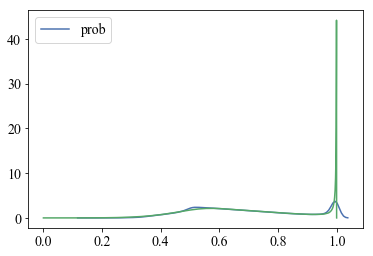

In [423]:
from scipy.stats import gaussian_kde
gk=gaussian_kde(np.log10(1-dataEAEB_all['prob']))
sns.kdeplot(dataEAEB_all['prob'])
xx = np.linspace(-5,0,200)
pp = 1-np.power(10.,xx)
plt.plot(pp, gk(xx)/(1-pp)/np.log(10))

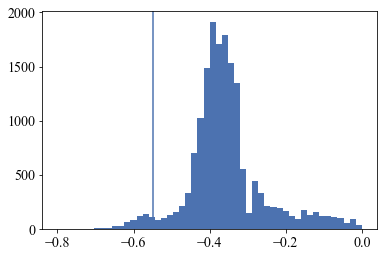

In [308]:
plt.hist(np.log10(period_fix(dataEW)),range=[-0.8,0.],bins=50);
plt.axvline(-0.55,-0.2)

In [207]:
np.count_nonzero(dataEW['amp_double_3']<dataEW['amp_double_1']*(0.125+dataEW['amp_double_1']))

16324

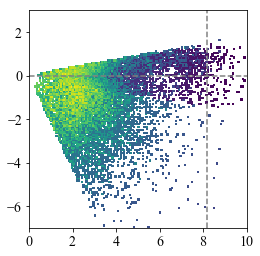

In [127]:
# J 183 −6.87 ± 0.25 −0.04 ± 0.11 0.23
# H 183 −5.99 ± 0.21 0.05 ± 0.10 0.20
# Ks 183 −5.95 ± 0.21 0.00 ± 0.09 0.19

coeff=0.44
dist_ew = np.power(10.,0.2*(
    dataEW['ks_ivw_mean_mag']-coeff*(dataEW['j_ivw_mean_mag']- dataEW['ks_ivw_mean_mag'])
    +(5.95-coeff*(6.87-5.95))*np.log10(period_fix(dataEW))
    +(0.-coeff*(0.04-0.)))-2)

def delta_b(l):
    return (np.sin(np.deg2rad(5.))+np.sin(np.deg2rad(10.)))*((l>350.)|(l<10.))+(2*np.sin(np.deg2rad(2.5)))*~((l>350.)|(l<10.))

plt.hist2d(dist_ew*np.cos(np.deg2rad(dataEW['l']))*np.cos(np.deg2rad(dataEW['b'])),
          dist_ew*np.sin(np.deg2rad(dataEW['l']))*np.cos(np.deg2rad(dataEW['b'])),
          range=[[0,10],[-7,3]],bins=150,norm=LogNorm(),
          weights=1./dist_ew/delta_b(dataEW['l'])
          );
plt.axvline(8.18,ls='dashed',color='gray')
plt.axhline(0.,ls='dashed',color='gray')
plt.gca().set_aspect('equal')

In [262]:
delta_b(np.array([5.]))

array([0.26381564])

In [268]:
len(dat)

NameError: name 'data' is not defined

## Kunder 

In [129]:
from astropy.table import Table
kunder = Table.read('kunder_ngc6441.fit')

In [200]:
import sqlutilpy
data_ngc6441 = ml_mb(pd.DataFrame(
         sqlutilpy.get('''
         with p as (select * from thomas_molnar.virac2_variable_sources_eaeb where prob>0.8 
         and class='RRab')
         select p.*,v.l,v.b,v.j_ivw_mean_mag,v.h_ivw_mean_mag,
         v.ks_ivw_mean_mag,v.j_ivw_err_mag,v.h_ivw_err_mag,
         v.ks_ivw_err_mag,v.pmra,v.pmdec,v.ra,v.dec,
         v.pmra_error, v.pmdec_error, v.pmra_pmdec_corr from p 
         inner join thomas_molnar.virac2_variable_data as v on p.sourceid=v.sourceid
         where q3c_radial_query(l,b,353.55,-5.,0.6)''',
                    **config.wsdb_kwargs)
       ))

In [201]:
from astropy.coordinates import SkyCoord
import astropy.units as u
sk = SkyCoord(l=data_ngc6441['l'].values*u.deg,b=data_ngc6441['b'].values*u.deg,frame='galactic')
skk = SkyCoord(l=kunder['GLON'],b=kunder['GLAT'],frame='galactic')
idx,d2d,d3d=sk.match_to_catalog_sky(skk)

In [202]:
match_vvv = data_ngc6441[d2d.arcsec<1.].reset_index(drop=True)
match_kunder = kunder[idx[d2d.arcsec<1.]]

In [ ]:
30513	o	353.6204	-05.1298	-3	5	3	0.265	15.323	16.606	0.62117217	9.00	3σ extra-tidal candidate
19	30603	o	353.6575	-05.1531	-3	5	3	0.256	16.065	17.274	0.60905742	11.50	3σ extra-tidal candidate
21	3613	o	353.3144	-05.0129	31	5	3	0.615	14.552	15.781	0.62322311	12.94	extra-tidal candidate
29	30792	o	353.6374	-05.2613	-5	10	3	0.494	16.663	17.752	0.68498653	16.40	3σ extra-tidal candidate
31	3168	o	353.4148	-04.7455	25	15	3	0.329	15.835	17.046	0.70627368	17.31	extra-tidal candidate
34	30928	o	353.7649	-05.2472	50	10	3	0.738	15.425	16.513	0.64609600	20.03	3σ extra-tidal candidate
38	31080	o	353.7257	-05.3643	41	5	3	0.764	15.692	16.622	0.51081605	24.29	extra-tidal candidate

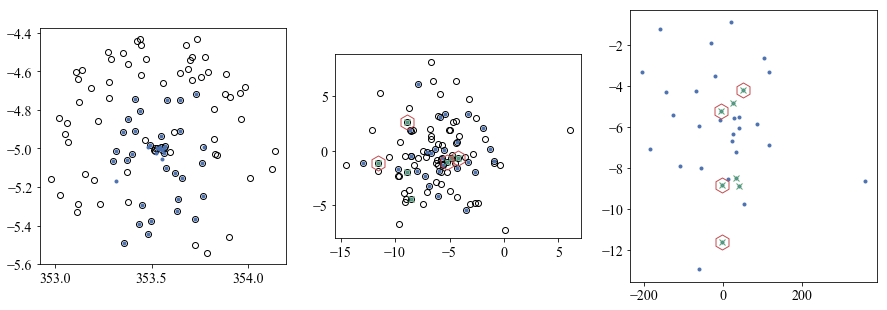

In [233]:
f,a=plt.subplots(1,3,figsize=[15.,5.])
plt.sca(a[0])
plt.plot(data_ngc6441['l'],data_ngc6441['b'],'o',mfc='None',color='k')
plt.plot(kunder['GLON'],kunder['GLAT'],'.')
plt.gca().set_aspect('equal')
plt.sca(a[1])
extra_tidal=np.array([30513,30603,3613,30792,3168,30928,31080])
conf = (np.array([1,1,0,1,0,1,0]).astype(bool))
plt.plot(data_ngc6441['pml'],data_ngc6441['pmb'],'o',mfc='None',color='k')
plt.plot(match_vvv['pml'],match_vvv['pmb'],'.')
kfltr = match_kunder.to_pandas()['OGLE'].isin(extra_tidal)
plt.plot(match_vvv['pml'][kfltr],match_vvv['pmb'][kfltr],'x')
kfltr = match_kunder.to_pandas()['OGLE'].isin(extra_tidal[conf])
plt.plot(match_vvv['pml'][kfltr].values,match_vvv['pmb'][kfltr].values,'h',ms=15,mfc='None')
plt.gca().set_aspect('equal')

plt.sca(a[2])
plt.plot(match_kunder['HRV'],match_vvv['pml'],'.')
kfltr = match_kunder.to_pandas()['OGLE'].isin(extra_tidal)
plt.plot(match_kunder['HRV'][kfltr],match_vvv['pml'][kfltr],'x')
kfltr = match_kunder.to_pandas()['OGLE'].isin(extra_tidal[conf])
plt.plot(match_kunder['HRV'][kfltr],match_vvv['pml'][kfltr],'h',ms=15,mfc='None')


In [242]:
pm_selection = (data_ngc6441['pml']>-7)&(data_ngc6441['pml']<-4)&(data_ngc6441['pmb']<1)&(data_ngc6441['pmb']>-2)

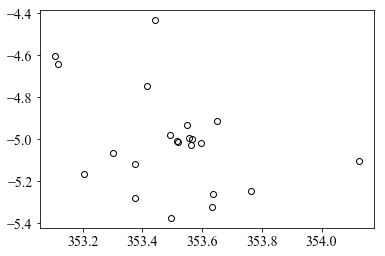

In [243]:
plt.plot(data_ngc6441['l'][pm_selection],data_ngc6441['b'][pm_selection],'o',mfc='None',color='k')


In [364]:
import sqlutilpy
dataEAEB_all = pd.DataFrame(
         sqlutilpy.get('''
         with p as (select * from thomas_molnar.virac2_variable_sources_eaeb where class='EA/EB')
         select p.*,v.l,v.b,v.j_ivw_mean_mag,v.h_ivw_mean_mag,
         v.ks_ivw_mean_mag,v.pmra,v.pmdec,v.ra,v.dec,
         v.pmra_error, v.pmdec_error, v.pmra_pmdec_corr from p 
         inner join thomas_molnar.virac2_variable_data as v on p.sourceid=v.sourceid''',
                    **config.wsdb_kwargs)
       )

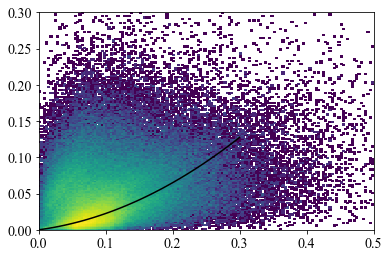

In [391]:
plt.hist2d(dataEAEB_all['amp_double_1'][
(np.log10(period_fix(dataEAEB_all))>-0.55)&
(np.log10(period_fix(dataEAEB_all))<-0.25)
],
           dataEAEB_all['amp_double_3'][
(np.log10(period_fix(dataEAEB_all))>-0.55)&
(np.log10(period_fix(dataEAEB_all))<-0.25)],range=[[0.,0.5],[0.,0.3]],bins=150,
          norm=LogNorm());
xx = np.linspace(0.,0.3)
plt.plot(xx, xx*(0.125+xx),color='k')

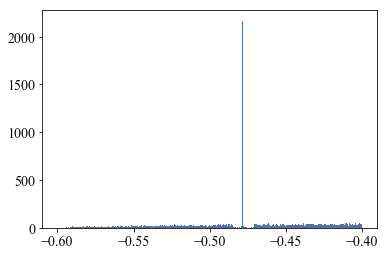

In [409]:
plt.hist(np.log10(dataEAEB['lsq_period']),bins=450,range=[-0.6,-0.4]);
# plt.hist(np.log10(period_fix(dataEW)),bins=150,range=[-0.55,-0.25]);
# plt.ylim(0.,2000.)
# plt.axvline(np.log10(0.333),color='k')

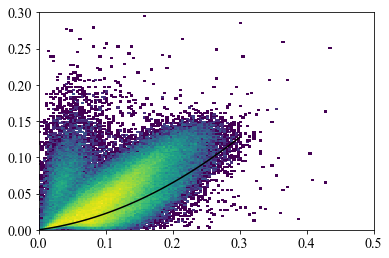

In [363]:
plt.hist2d(dataEAEB['amp_double_1'],dataEAEB['amp_double_3'],range=[[0.,0.5],[0.,0.3]],bins=150,
          norm=LogNorm());
xx = np.linspace(0.,0.3)
plt.plot(xx, xx*(0.125+xx),color='k')

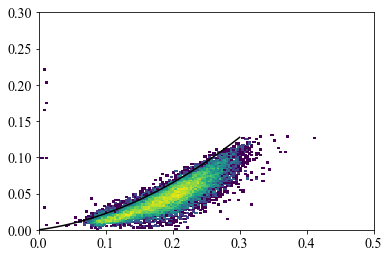

In [362]:
plt.hist2d(dataEW['amp_double_1'],dataEW['amp_double_3'],range=[[0.,0.5],[0.,0.3]],bins=150,
          norm=LogNorm());
xx = np.linspace(0.,0.3)
plt.plot(xx, xx*(0.125+xx),color='k')

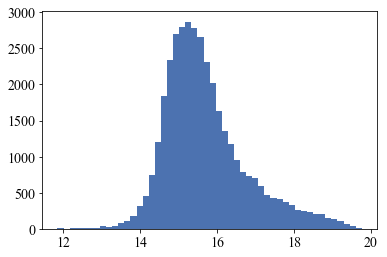

In [554]:
plt.hist(data['j_ivw_mean_mag'],bins=50);

In [555]:
plt.hist2d(data['z_ivw_mean_mag'],data['b'],bins=150,norm=LogNorm(),range=[]);

KeyError: 'z_ivw_mean_mag'

In [563]:
import h5py
with h5py.File("/data/jls/virac/n512_2318830.hdf5",'r') as f:
    s_hdf = f['sourceList']['j_b_ivw_mean_mag'][:]

In [566]:
np.count_nonzero(s_hdf>0)

/data/jls/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


11360

In [ ]:
plot_lc_sid()